In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import math


# Expected:

In [38]:
# Solar

# Extract & Transform
df = pd.read_csv('../../data/produkt_zehn_min_sd_20200101_20201231_05705.txt', delimiter = ";")

# Remove unneccesary columns
df.drop(['STATIONS_ID', '  QN', 'DS_10', 'SD_10', 'LS_10', 'eor'], axis = 1, inplace = True)

# / 1000 to convert from J/cm² to kJ/cm² then * 2.78 to convert to kWh/m², then * 50m^2 and * 6000 to convert to W/10 Min/m²) 
df['Watt_10min'] =  df['GS_10'] / 1000 * 2.78 * 50 * 6000 * 0.2

df['MESS_DATUM'] = pd.to_datetime(df['MESS_DATUM'], format='%Y%m%d%H%M')

solar = df

solar.head()

,MESS_DATUM,GS_10,Watt_10min
0,2020-01-01 00:00:00,0.0,0.0
1,2020-01-01 00:10:00,0.0,0.0
2,2020-01-01 00:20:00,0.0,0.0
3,2020-01-01 00:30:00,0.0,0.0
4,2020-01-01 00:40:00,0.0,0.0


In [27]:
# Wind
df = pd.read_csv('../../data/produkt_zehn_min_ff_20200101_20201231_05705.txt', delimiter = ";")

# Remove unneccesary columns
df.drop(['STATIONS_ID', '  QN', 'DD_10', 'eor'], axis = 1, inplace = True)

# Calculate 10 Min Output
df['Watt_10min'] =  math.pi / 2 * 5.1**2 * df['FF_10']**3 * 1.2 * 0.5
# set ceiling
df['Watt_10min'].values[df['Watt_10min'] > 9999] = 10000

df['MESS_DATUM'] = pd.to_datetime(df['MESS_DATUM'], format='%Y%m%d%H%M')

wind = df
wind.head()


,MESS_DATUM,FF_10,Watt_10min
0,2020-01-01 00:00:00,0.8,12.551090
1,2020-01-01 00:10:00,0.6,5.294991
2,2020-01-01 00:20:00,0.9,17.870595
3,2020-01-01 00:30:00,0.8,12.551090
4,2020-01-01 00:40:00,1.6,100.408719


In [6]:
# Mixed
mixed = solar
mixed['Watt_10min'] = solar['Watt_10min']*0.6 + wind['Watt_10min']*0.6

df = mixed
mixed.head()

,MESS_DATUM,GS_10,Watt_10min
0,2020-01-01 00:00:00,0.0,7.530654
1,2020-01-01 00:10:00,0.0,3.176995
2,2020-01-01 00:20:00,0.0,10.722357
3,2020-01-01 00:30:00,0.0,7.530654
4,2020-01-01 00:40:00,0.0,60.245232


In [39]:
# Filter
start_date = '2020-10-01 00:00:00'
end_date = '2020-10-02 00:00:00'

mask = (df['MESS_DATUM'] >= start_date) & (df['MESS_DATUM'] < end_date)

selected_dates = df.loc[mask]

#selected_dates.set_index('MESS_DATUM')

selected_dates.tail()

,MESS_DATUM,GS_10,Watt_10min
30766,2020-08-01 15:40:00,23.6,3936.48
30767,2020-08-01 15:50:00,12.0,2001.60
30768,2020-08-01 16:00:00,11.0,1834.80
30769,2020-08-01 16:10:00,9.9,1651.32
30770,2020-08-01 16:20:00,7.2,1200.96
30771,2020-08-01 16:30:00,5.2,867.36
30772,2020-08-01 16:40:00,4.0,667.20
30773,2020-08-01 16:50:00,5.0,834.00
30774,2020-08-01 17:00:00,7.0,1167.60
30775,2020-08-01 17:10:00,5.9,984.12


Text(0, 0.5, 'Watt')

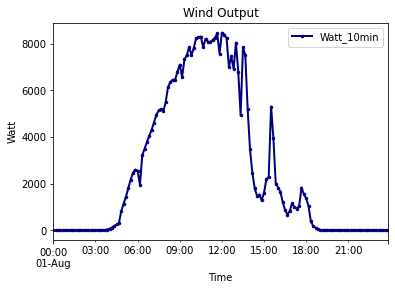

In [40]:
ax = selected_dates.plot(lw=2, colormap='jet', marker='.', markersize=5, title='Wind Output', figsize=(6, 4), x='MESS_DATUM', y='Watt_10min')
ax.set_xlabel("Time")
ax.set_ylabel("Watt")

# Evaluation:

Text(0, 0.5, 'Watt')

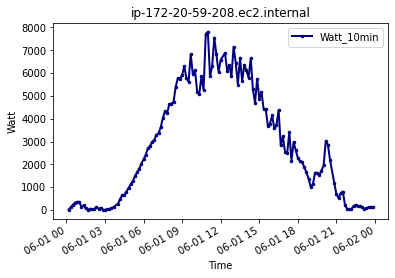

In [6]:
#read input file
fin = open("evaluation.log", "rt")
#read file contents to string
data = fin.read()
#replace all occurrences of the required string
data = data.replace(' Node ', ';').replace(' has a mixed share of: ', ';').replace(' has a solar share of: ', ';').replace(' has a wind share of: ', ';')

fin.close()
#open the input file in write mode
fin = open("evaluationprepared.txt", "wt")
#overrite the input file with the resulting data
fin.write(data)
#close the file
fin.close()

df = pd.read_csv('evaluationprepared.txt', delimiter = ";", names=["ts", "node", "Watt_10min", "1h", "4h", "12h", "24h"])
df['ts'] = pd.to_datetime(df['ts'])

mask = (df['node'] == 'ip-172-20-59-208.ec2.internal')

selected_node = df.loc[mask]


ax = selected_node.plot(lw=2, colormap='jet', marker='.', markersize=5, title='ip-172-20-59-208.ec2.internal', figsize=(6, 4), x='ts', y='Watt_10min')
ax.set_xlabel("Time")
ax.set_ylabel("Watt")



